# Comprehensive Data-Driven Analysis of Olympic Athlete Performance and Participation Trends

## 2024-25 Group: 6

*This is the MN5813 Group Assignment from Group 6.*

- Flavio Gordon ID 101116087

## Project summary

This project investigates long-term patterns in Olympic history using the publicly available “athlete_events” dataset. The script is designed to be fully reproducible, beginning with an automated procedure that downloads the dataset directly from a GitHub repository. This ensures that any user running the code—regardless of their environment—obtains the same raw data without manual intervention. After loading the dataset, the project conducts an initial structural examination, including column inspection, descriptive statistics, and an assessment of missing values.

Comprehensive data cleaning is carried out to improve analytical quality. Duplicate entries are removed, the Year variable is transformed into a datetime format, and several derived features are created, such as age groups, decade and century indicators, and a binary variable identifying whether an athlete won a medal. These engineered features provide a clearer basis for temporal, demographic, and performance-based comparisons.

The analytical section of the project explores multiple dimensions of Olympic participation and achievement. Key components include identifying which sports have the oldest and youngest athletes, determining the countries with the highest number of gold medals, and highlighting the most decorated athletes within each sport. Additional trend analyses examine how overall participation, medal counts, and female representation have evolved over time. Gender-based comparisons are also conducted to evaluate differences in participation levels and medal-winning rates.

Finally, the project exports a cleaned version of the dataset and produces a series of visualisations—such as dashboards and small-multiples charts—to effectively communicate major insights. Overall, the project demonstrates a complete, end-to-end workflow for transforming raw Olympic data into meaningful analytical conclusions.

## Generative AI

This project makes use of generative AI strictly as a support tool for improving clarity, structure, and coding efficiency. All analytical decisions, coding logic, data transformations, and interpretations included in the project were reviewed, validated, and implemented by the author. Generative AI was used only for the following purposes: refining the wording of explanations, assisting in debugging code when errors occurred, and suggesting alternative approaches for data processing and visualisation.

No sections of the project were automatically generated without review, and no analytical results, interpretations, or conclusions were accepted without verification against the dataset. The dataset itself, the analytical workflow, and every visual output were executed manually in Python by the author.

The responsibility for the accuracy, validity, and integrity of the work presented in this project remains entirely with the author. The use of generative AI did not replace academic judgement or independent problem-solving, and all contributions from AI tools were critically evaluated before being incorporated.

## Introduction

The Olympic Games represent one of the most comprehensive and consistent historical records of global athletic performance. With data spanning more than a century, the Olympics provide a unique opportunity to analyse how athlete characteristics, participation trends, and competitive outcomes have evolved over time. This project uses the “athlete_events” dataset, a publicly available compilation of every athlete participation in both Summer and Winter Games, to explore these long-term patterns in a systematic and data-driven way.

To ensure full reproducibility, the project implements an automated data-loading procedure that retrieves the dataset directly from an online repository. Once the data is acquired, the workflow focuses on essential data management tasks, including structural exploration, cleaning, duplicate removal, handling of missing values, and the creation of additional analytical features such as age groups, decade indicators, century categories, and a binary medal-winning variable. These steps establish a reliable foundation for deeper investigation of demographic, temporal, and performance-related trends.

The analytical component of the project examines several core themes: how athlete age varies across sports, how medal distributions differ between countries, which athletes are the most decorated within each discipline, and how participation and gender representation have changed across decades. Through a combination of statistical summaries and visualisation techniques, the project seeks to reveal patterns that are not immediately visible in raw tabular data.

Project Aim
To analyse historical Olympic participation and performance trends by transforming raw athlete data into structured insights that highlight demographic, temporal, and competitive patterns.

Objectives:

-Load, inspect, and clean the dataset to ensure analytical reliability.

-Engineer new variables to enable deeper comparative analysis.

-Identify key trends in participation, performance, and gender representation.

-Visualise major patterns using clear, reproducible plots and summaries.

## Setup

### Import necessary libraries

### Load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import core libraries:
# - pandas: data manipulation and analysis
# - numpy: numerical operations
# - matplotlib.pyplot: basic plotting
# - seaborn: statistical data visualisation built on top of matplotlib

# Set display options for better visibility of DataFrames in the notebook
pd.set_option('display.max_columns', 15)   # Show up to 15 columns when printing a DataFrame
pd.set_option('display.max_rows', 100)    # Show up to 100 rows
pd.set_option('display.width', None)      # Do not truncate columns based on console width

# Set a consistent visual theme for all seaborn/matplotlib plots
sns.set_theme()  # Applies a clean, modern default style to all charts

In [2]:
def load_olympic_data(url=None):
    """
    Download the Olympic athlete_events dataset and save it locally.

    The function checks whether a local copy of the dataset already exists.
    If the file is present, it returns the existing path without downloading it again.
    If the file is not present, it downloads the CSV from the specified URL
    (or from the default GitHub source) and stores it in assets/data/.

    Parameters
    ----------
    url : str, optional
        URL of the CSV file to download.
        If no URL is provided, the function uses the original public source:
        https://github.com/rgriff23/Olympic_history

    Returns
    -------
    str
        Local file path to the downloaded (or existing) CSV file.
    """
    import urllib.request
    from pathlib import Path

    # If no URL is provided, use the original data source
    if not url:
        url = "https://raw.githubusercontent.com/rgriff23/Olympic_history/refs/heads/master/data/athlete_events.csv"
    
    # Define the default output directory and file name
    output_dir = Path("assets/data")          # Folder where the file will be stored
    output_name = url.split('/')[-1]         # Extract file name from URL (e.g. 'athlete_events.csv')
    output_path = output_dir / output_name   # Full path: assets/data/athlete_events.csv
    
    # If the file already exists, skip the download and reuse it
    if output_path.exists():
        print(f"File already exists: {output_path}")
        print("Will not proceed with downloading this file!")
        return str(output_path)
    
    # Create the directory structure if it does not exist
    print(f"Creating directory: {output_dir}")
    output_dir.mkdir(parents=True, exist_ok=True)
    
    # Download the dataset from the URL
    print(f"Downloading dataset ...\n{url}")
    req = urllib.request.Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    
    with urllib.request.urlopen(req, timeout=60) as response:
        data = response.read()
        # Save the downloaded data as a local CSV file
        with open(output_path, 'wb') as f:
            f.write(data)
        print(f"Dataset saved as: {output_path}")

    # Return the local path as a string so it can be used with pd.read_csv()
    return str(output_path)

In [3]:
# Load the Olympic dataset using the helper function and read it into a pandas DataFrame
csv_path = load_olympic_data()     # Returns the local path to the CSV file
df = pd.read_csv(csv_path)         # Reads the CSV into a DataFrame called `df`

# Print basic information about the dataset size
print(f"Dataset loaded: {len(df)} rows, {len(df.columns)} columns")

# Print the list of column names to understand the structure of the data
print(f"\nColumn names:\n{list(df.columns)}")

File already exists: assets\data\athlete_events.csv
Will not proceed with downloading this file!
Dataset loaded: 271116 rows, 15 columns

Column names:
['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal']


In [4]:
# View first few rows
print("First 10 rows:")
df.head(10)

First 10 rows:


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [5]:
# Get dataset information
print("Dataset information:")
df.info()

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [6]:
# Get summary statistics for numeric columns
print("Summary statistics:")
df.describe()

Summary statistics:


,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


## Data management

### Data cleaning

In [7]:
# Count missing values per column
missing = df.isnull().sum()  # Number of missing (NaN) values in each column

# Calculate the percentage of missing values per column
missing_pct = (df.isnull().sum() / len(df) * 100).round(1)

# Combine counts and percentages into a summary DataFrame
missing_summary = pd.DataFrame({
    'Missing_Count': missing,
    'Missing_Percent': missing_pct
})

# Display only columns that have at least one missing value,
# sorted by the highest number of missing entries
print("Missing values summary:")
print(
    missing_summary[
        missing_summary['Missing_Count'] > 0
    ].sort_values('Missing_Count', ascending=False)
)

Missing values summary:
        Missing_Count  Missing_Percent
Medal          231333             85.3
Weight          62875             23.2
Height          60171             22.2
Age              9474              3.5


In [8]:
# Check current data types
print("Current data types:")
print(df.dtypes)

Current data types:
ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object


In [9]:
# Convert Year to datetime for time-based analysis
df['Year_dt'] = pd.to_datetime(df['Year'], format='%Y')

print("\nAdded Year_dt column:")
print(df[['Year', 'Year_dt']].head())
print(f"\nData type of Year_dt: {df['Year_dt'].dtype}")


Added Year_dt column:
   Year    Year_dt
0  1992 1992-01-01
1  2012 2012-01-01
2  1920 1920-01-01
3  1900 1900-01-01
4  1988 1988-01-01

Data type of Year_dt: datetime64[ns]


In [10]:
# Check for duplicates
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

if duplicates.sum() > 0:
    print(f"\nDuplicate rows:")
    print(df[duplicates])

Number of duplicate rows: 1385

Duplicate rows:
            ID                                 Name Sex   Age  Height  Weight  \
1252       704                   Dsir Antoine Acket   M  27.0     NaN     NaN   
4282      2449               William Truman Aldrich   M  48.0     NaN     NaN   
4283      2449               William Truman Aldrich   M  48.0     NaN     NaN   
4862      2777               Hermann Reinhard Alker   M  43.0     NaN     NaN   
4864      2777               Hermann Reinhard Alker   M  43.0     NaN     NaN   
...        ...                                  ...  ..   ...     ...     ...   
269994  135072  Anna Katrina Zinkeisen (-Heseltine)   F  46.0     NaN     NaN   
269995  135072  Anna Katrina Zinkeisen (-Heseltine)   F  46.0     NaN     NaN   
269997  135072  Anna Katrina Zinkeisen (-Heseltine)   F  46.0     NaN     NaN   
269999  135073   Doris Clare Zinkeisen (-Johnstone)   F  49.0     NaN     NaN   
270200  135173                     Henri Achille Zo   M  58.0

In [11]:
# Remove duplicates
df_clean = df.drop_duplicates()
print(f"\nOriginal rows: {len(df)}")
print(f"After removing duplicates: {len(df_clean)}")
print(f"Rows removed: {len(df) - len(df_clean)}")
    
# Use the cleaned dataset going forward
df = df_clean


Original rows: 271116
After removing duplicates: 269731
Rows removed: 1385


Data Wrangling

In [12]:
# Create age groups using pd.cut()
df['Age_Group'] = pd.cut(
    df['Age'],
    bins=[0, 18, 25, 35, 100],
    labels=['0-18', '19-25', '26-35', '36+']
)

print("Age group distribution:")
print(df['Age_Group'].value_counts().sort_index())

print("\nSample of Age with Age_Group:")
print(df[['Name', 'Age', 'Age_Group']].head(10))

Age group distribution:
Age_Group
0-18      20656
19-25    130126
26-35     94220
36+       15414
Name: count, dtype: int64

Sample of Age with Age_Group:
                       Name   Age Age_Group
0                 A Dijiang  24.0     19-25
1                  A Lamusi  23.0     19-25
2       Gunnar Nielsen Aaby  24.0     19-25
3      Edgar Lindenau Aabye  34.0     26-35
4  Christine Jacoba Aaftink  21.0     19-25
5  Christine Jacoba Aaftink  21.0     19-25
6  Christine Jacoba Aaftink  25.0     19-25
7  Christine Jacoba Aaftink  25.0     19-25
8  Christine Jacoba Aaftink  27.0     26-35
9  Christine Jacoba Aaftink  27.0     26-35


In [13]:
# Check name format
print("Sample names:")
print(df['Name'].head(10))

print("\nName column is already in full name format - no processing needed.")

Sample names:
0                   A Dijiang
1                    A Lamusi
2         Gunnar Nielsen Aaby
3        Edgar Lindenau Aabye
4    Christine Jacoba Aaftink
5    Christine Jacoba Aaftink
6    Christine Jacoba Aaftink
7    Christine Jacoba Aaftink
8    Christine Jacoba Aaftink
9    Christine Jacoba Aaftink
Name: Name, dtype: object

Name column is already in full name format - no processing needed.


In [14]:
# Extract century from year
# Century: 2000-2099 = 21st century, 1900-1999 = 20th century
df['Century'] = ((df['Year'] - 1) // 100 + 1)

print("Century distribution:")
print(df['Century'].value_counts().sort_index())

print("\nSample of Year with Century:")
print(df[['Year', 'Century']].drop_duplicates().sort_values('Year'))

Century distribution:
Century
19      2278
20    196016
21     71437
Name: count, dtype: int64

Sample of Year with Century:
      Year  Century
3079  1896       19
3     1900       19
711   1904       20
268   1906       20
1149  1908       20
35    1912       20
2     1920       20
39    1924       20
133   1928       20
26    1932       20
94    1936       20
41    1948       20
29    1952       20
111   1956       20
83    1960       20
85    1964       20
89    1968       20
90    1972       20
145   1976       20
30    1980       20
87    1984       20
4     1988       20
0     1992       20
8     1994       20
32    1996       20
68    1998       20
31    2000       20
28    2002       21
82    2004       21
77    2006       21
79    2008       21
245   2010       21
1     2012       21
40    2014       21
80    2016       21


In [15]:
# Create decade column for more granular time analysis
df['Decade'] = (df['Year'] // 10) * 10

print("Decade distribution:")
print(df['Decade'].value_counts().sort_index())

print("\nSample of Year with Decade:")
print(df[['Year', 'Decade']].drop_duplicates().sort_values('Year').head(10))

Decade distribution:
Decade
1890      380
1900     8001
1910     4040
1920    15100
1930     9963
1940     7383
1950    15792
1960    29194
1970    22461
1980    35201
1990    36958
2000    49357
2010    35901
Name: count, dtype: int64

Sample of Year with Decade:
      Year  Decade
3079  1896    1890
3     1900    1900
711   1904    1900
268   1906    1900
1149  1908    1900
35    1912    1910
2     1920    1920
39    1924    1920
133   1928    1920
26    1932    1930


In [16]:
# Create medal indicator (won medal or not)
df['Won_Medal'] = df['Medal'].notna()

print("Medal win distribution:")
print(df['Won_Medal'].value_counts())

medal_rate = (df['Won_Medal'].sum() / len(df) * 100)
print(f"\nPercentage of participations that won medals: {medal_rate:.2f}%")

Medal win distribution:
Won_Medal
False    229959
True      39772
Name: count, dtype: int64

Percentage of participations that won medals: 14.75%


## Data analysis

Average age by Olympic event:
Sport
Roque                        53.3
Art Competitions             44.7
Alpinism                     38.8
Polo                         35.3
Equestrianism                34.4
Croquet                      33.7
Shooting                     33.4
Motorboating                 33.3
Jeu De Paume                 32.5
Curling                      31.4
Sailing                      30.3
Skeleton                     29.8
Golf                         29.4
Cricket                      29.3
Tug-Of-War                   29.3
Beach Volleyball             29.1
Bobsleigh                    29.1
Racquets                     28.7
Fencing                      28.5
Archery                      27.9
Triathlon                    27.9
Lacrosse                     26.9
Biathlon                     26.5
Table Tennis                 26.5
Modern Pentathlon            26.4
Handball                     26.3
Softball                     26.3
Baseball                     26.2
Rugby Sevens

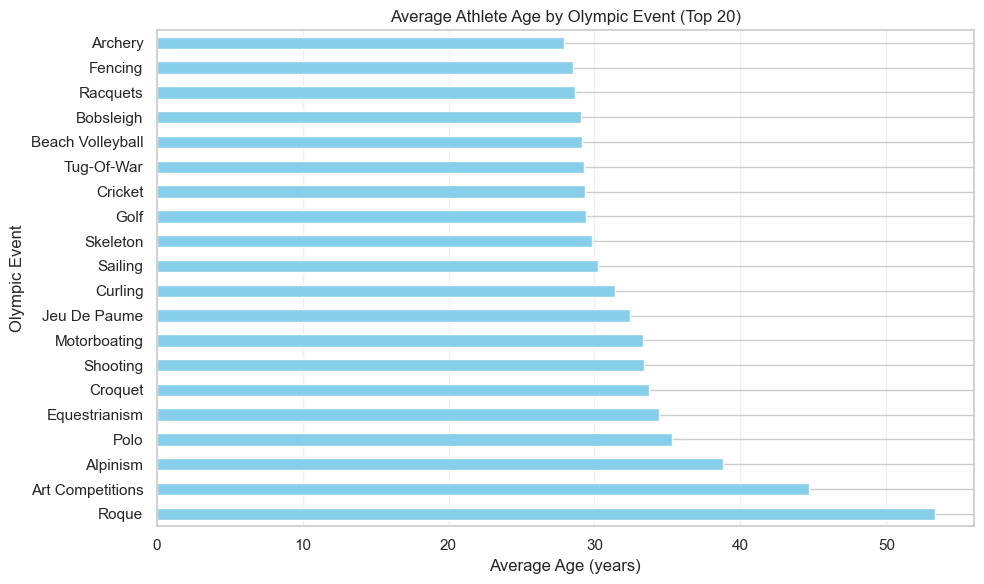

In [33]:
# Calculate the average age for each Olympic sport
avg_age_by_event = df.groupby('Sport')['Age'].mean().sort_values(ascending=False)

print("Average age by Olympic event:")
print(avg_age_by_event.round(1))
plt.figure(figsize=(10, 6))
avg_age_by_event.head(20).plot(kind='barh', color='skyblue')
plt.xlabel("Average Age (years)")
plt.ylabel("Olympic Event")
plt.title("Average Athlete Age by Olympic Event (Top 20)")
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

Top 10 countries with most gold medals:
NOC
USA    2638
URS    1082
GER     745
GBR     677
ITA     575
FRA     499
SWE     479
CAN     463
HUN     432
GDR     397
Name: Medal, dtype: int64


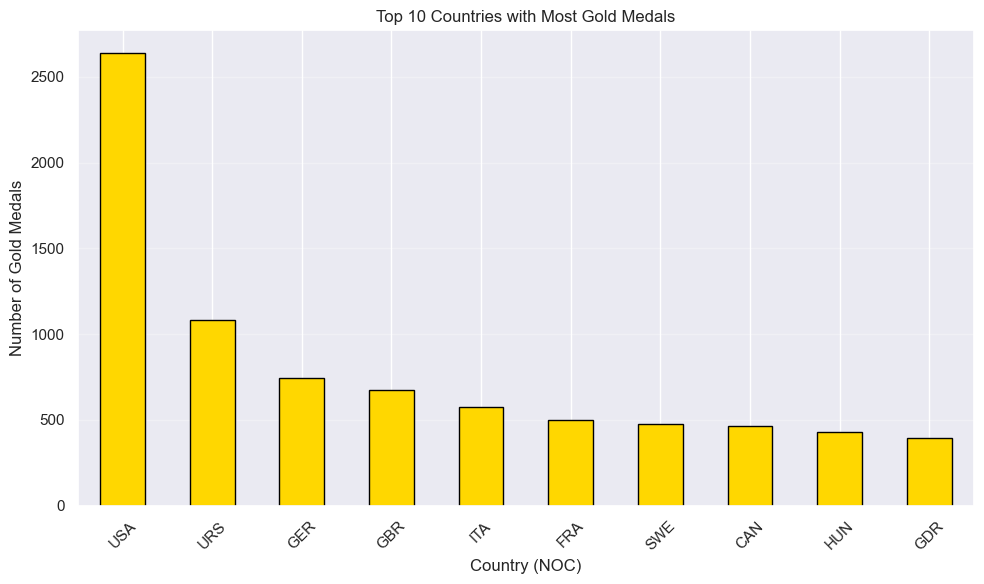

In [18]:
# Count total gold medals by country
gold_medals_by_country = df[df['Medal'] == 'Gold'].groupby('NOC')['Medal'].count().sort_values(ascending=False)

print("Top 10 countries with most gold medals:")
print(gold_medals_by_country.head(10))

# Visualize top 10 countries
plt.figure(figsize=(10, 6))
gold_medals_by_country.head(10).plot(kind='bar', color='gold', edgecolor='black')
plt.xlabel("Country (NOC)")
plt.ylabel("Number of Gold Medals")
plt.title("Top 10 Countries with Most Gold Medals")
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [21]:
# For each sport, find the athlete with the most medals
# First, count medals per athlete per sport
athlete_medals = df[df['Medal'].notna()].groupby(
    ['Sport', 'Name']
).size().reset_index(name='medal_count')

# Find the athlete with most medals in each sport
idx = athlete_medals.groupby('Sport')['medal_count'].idxmax()
top_athletes = athlete_medals.loc[idx]

print("Most decorated athlete by sport:")
print(top_athletes.sort_values('medal_count', ascending=False).to_string(index=False))

Most decorated athlete by sport:
                    Sport                                        Name  medal_count
                 Swimming                     Michael Fred Phelps, II           28
               Gymnastics          Larysa Semenivna Latynina (Diriy-)           18
                 Biathlon                         Ole Einar Bjrndalen           13
                  Fencing                         Edoardo Mangiarotti           13
                 Canoeing                      Birgit Fischer-Schmidt           12
                Athletics                        Paavo Johannes Nurmi           12
                 Shooting                        Carl Townsend Osburn           11
     Cross Country Skiing                                Marit Bjrgen           10
            Equestrianism                       Isabelle Regina Werth           10
Short Track Speed Skating                                   Yang Yang           10
                  Archery             Gerard Theodor H

Medals by country and sport (Top 10 countries):
Sport  Aeronautics  Alpine Skiing  Alpinism  Archery  Art Competitions  \
NOC                                                                      
Total            1            428        25      353               156   
USA              0             44         0       57                 9   
URS              0              1         0        7                 0   
GER              0             31         2        7                26   
GBR              0              0        12       13                 9   
FRA              0             45         0       48                15   
ITA              0             30         0       15                14   
SWE              0             16         0        2                 4   
CAN              0             11         0        0                 2   
AUS              0              1         1        5                 0   

Sport  Athletics  Badminton  ...  Triathlon  Tug-Of-War  Volley

<Figure size 1200x600 with 0 Axes>

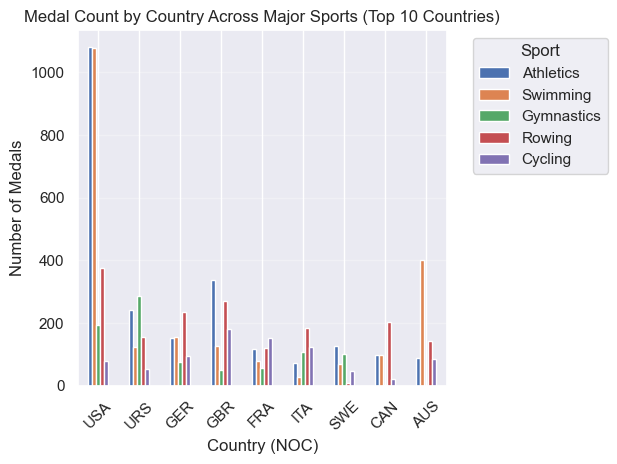

In [22]:
# Medals by country and sport (top 10 countries)
medals_pivot = pd.pivot_table(
    df[df['Medal'].notna()],
    values='ID',
    index='NOC',
    columns='Sport',
    aggfunc='count',
    fill_value=0,
    margins=True,
    margins_name='Total'
)

# Get top 10 countries by total medals
top_10_countries = medals_pivot.sort_values('Total', ascending=False).head(10)
print("Medals by country and sport (Top 10 countries):")
print(top_10_countries)

# Visualize top 10 countries across selected sports
# Select most popular sports for visualization
top_sports = ['Athletics', 'Swimming', 'Gymnastics', 'Rowing', 'Cycling']
viz_data = top_10_countries[top_sports].drop('Total', errors='ignore')

plt.figure(figsize=(12, 6))
viz_data.plot(kind='bar', stacked=False)
plt.xlabel("Country (NOC)")
plt.ylabel("Number of Medals")
plt.title("Medal Count by Country Across Major Sports (Top 10 Countries)")
plt.legend(title="Sport", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Evolution of Olympic metrics over time:

Participation by year (last 10):
Year
1998     3605
2000    13821
2002     4109
2004    13443
2006     4382
2008    13602
2010     4402
2012    12920
2014     4891
2016    13688
dtype: int64

Female participation rate % (last 10):
Year
1998    38.4
2000    39.3
2002    38.5
2004    41.3
2006    40.1
2008    42.8
2010    42.0
2012    45.0
2014    41.4
2016    45.5
Name: Sex, dtype: float64


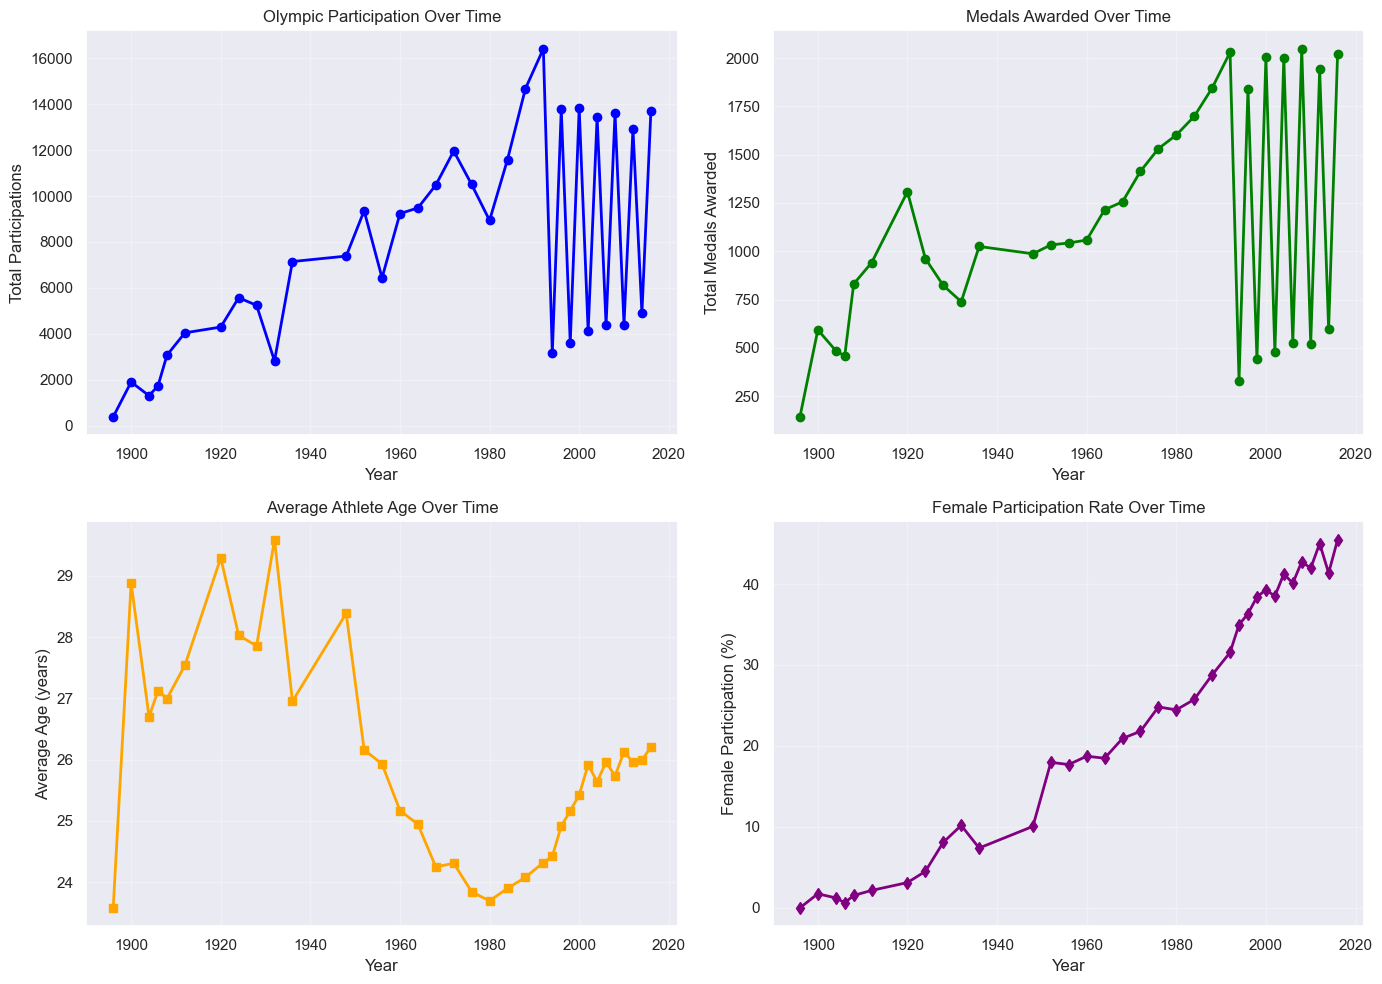

In [23]:
# Participation trend (total athlete-events per year)
participation_by_year = df.groupby('Year').size()

# Medal count trend
medals_by_year = df[df['Medal'].notna()].groupby('Year')['Medal'].count()

# Average age trend
avg_age_by_year = df.groupby('Year')['Age'].mean()

# Female participation rate (in %)
female_rate = df.groupby('Year')['Sex'].apply(lambda x: (x == 'F').sum() / len(x) * 100)

print("Evolution of Olympic metrics over time:")
print("\nParticipation by year (last 10):")
print(participation_by_year.tail(10))
print("\nFemale participation rate % (last 10):")
print(female_rate.tail(10).round(1))

# Visualize all trends in subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Participation trend
axes[0, 0].plot(participation_by_year.index, participation_by_year.values, marker='o', color='blue', linewidth=2)
axes[0, 0].set_xlabel("Year")
axes[0, 0].set_ylabel("Total Participations")
axes[0, 0].set_title("Olympic Participation Over Time")
axes[0, 0].grid(True, alpha=0.3)

# Medal count trend
axes[0, 1].plot(medals_by_year.index, medals_by_year.values, marker='o', color='green', linewidth=2)
axes[0, 1].set_xlabel("Year")
axes[0, 1].set_ylabel("Total Medals Awarded")
axes[0, 1].set_title("Medals Awarded Over Time")
axes[0, 1].grid(True, alpha=0.3)

# Average age trend
axes[1, 0].plot(avg_age_by_year.index, avg_age_by_year.values, marker='s', color='orange', linewidth=2)
axes[1, 0].set_xlabel("Year")
axes[1, 0].set_ylabel("Average Age (years)")
axes[1, 0].set_title("Average Athlete Age Over Time")
axes[1, 0].grid(True, alpha=0.3)

# Female participation rate
axes[1, 1].plot(female_rate.index, female_rate.values, marker='d', color='purple', linewidth=2)
axes[1, 1].set_xlabel("Year")
axes[1, 1].set_ylabel("Female Participation (%)")
axes[1, 1].set_title("Female Participation Rate Over Time")
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Gender distribution in dataset:
Sex
M    195353
F     74378
Name: count, dtype: int64

Percentages:
Sex
M    72.4
F    27.6
Name: count, dtype: float64

Performance by gender:
     total_participations  medals_won  medal_rate_%
Sex                                                
F                   74378       11253          15.1
M                  195353       28519          14.6


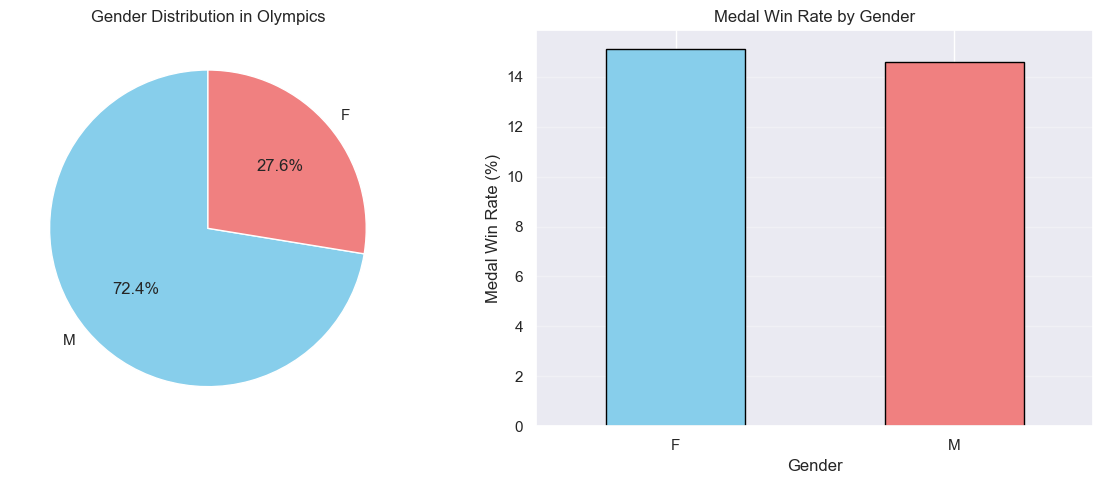

In [24]:
# Overall gender distribution
gender_dist = df['Sex'].value_counts()

print("Gender distribution in dataset:")
print(gender_dist)
print(f"\nPercentages:")
print((gender_dist / len(df) * 100).round(1))

# Medal win rate by gender
gender_performance = df.groupby('Sex').agg({
    'ID': 'count',
    'Medal': lambda x: x.notna().sum()
}).rename(columns={'ID': 'total_participations', 'Medal': 'medals_won'})

gender_performance['medal_rate_%'] = (
    gender_performance['medals_won'] / gender_performance['total_participations'] * 100
).round(1)

print("\nPerformance by gender:")
print(gender_performance)

# Visualize gender distribution and medal rates
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Gender distribution (pie chart)
axes[0].pie(gender_dist.values, labels=gender_dist.index, autopct='%1.1f%%', 
            colors=['skyblue', 'lightcoral'], startangle=90)
axes[0].set_title("Gender Distribution in Olympics")

# Plot 2: Medal win rate by gender (bar chart)
gender_performance['medal_rate_%'].plot(kind='bar', ax=axes[1], color=['skyblue', 'lightcoral'], 
                                         edgecolor='black')
axes[1].set_xlabel("Gender")
axes[1].set_ylabel("Medal Win Rate (%)")
axes[1].set_title("Medal Win Rate by Gender")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

Medal win rate by country (Top 15):
NOC
URS    44.03
GDR    38.00
ANZ    33.72
EUN    32.29
USA    30.30
WIF    25.00
RUS    22.65
GER    22.24
SRB    21.68
PAK    21.53
NOR    20.85
SCG    19.94
CHN    19.24
SWE    18.53
JAM    18.51
Name: Won_Medal, dtype: float64


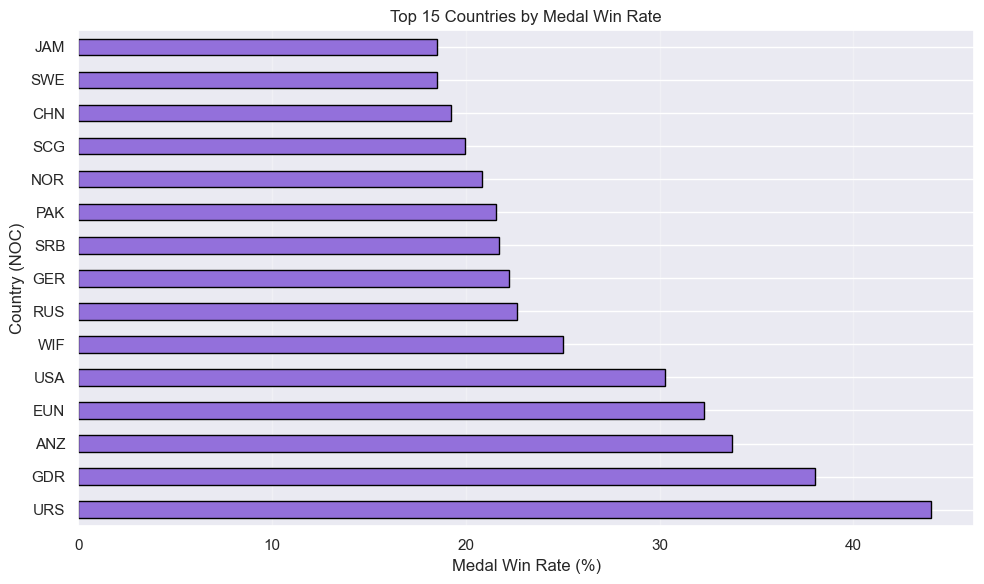

In [25]:
# Calculate medal win rate (%) by country
win_rate_by_country = (df.groupby('NOC')['Won_Medal'].mean() * 100).sort_values(ascending=False)

print("Medal win rate by country (Top 15):")
print(win_rate_by_country.head(15).round(2))

# Visualize top 15 countries
plt.figure(figsize=(10, 6))
win_rate_by_country.head(15).plot(kind='barh', color='mediumpurple', edgecolor='black')
plt.xlabel("Medal Win Rate (%)")
plt.ylabel("Country (NOC)")
plt.title("Top 15 Countries by Medal Win Rate")
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## Data visualisation

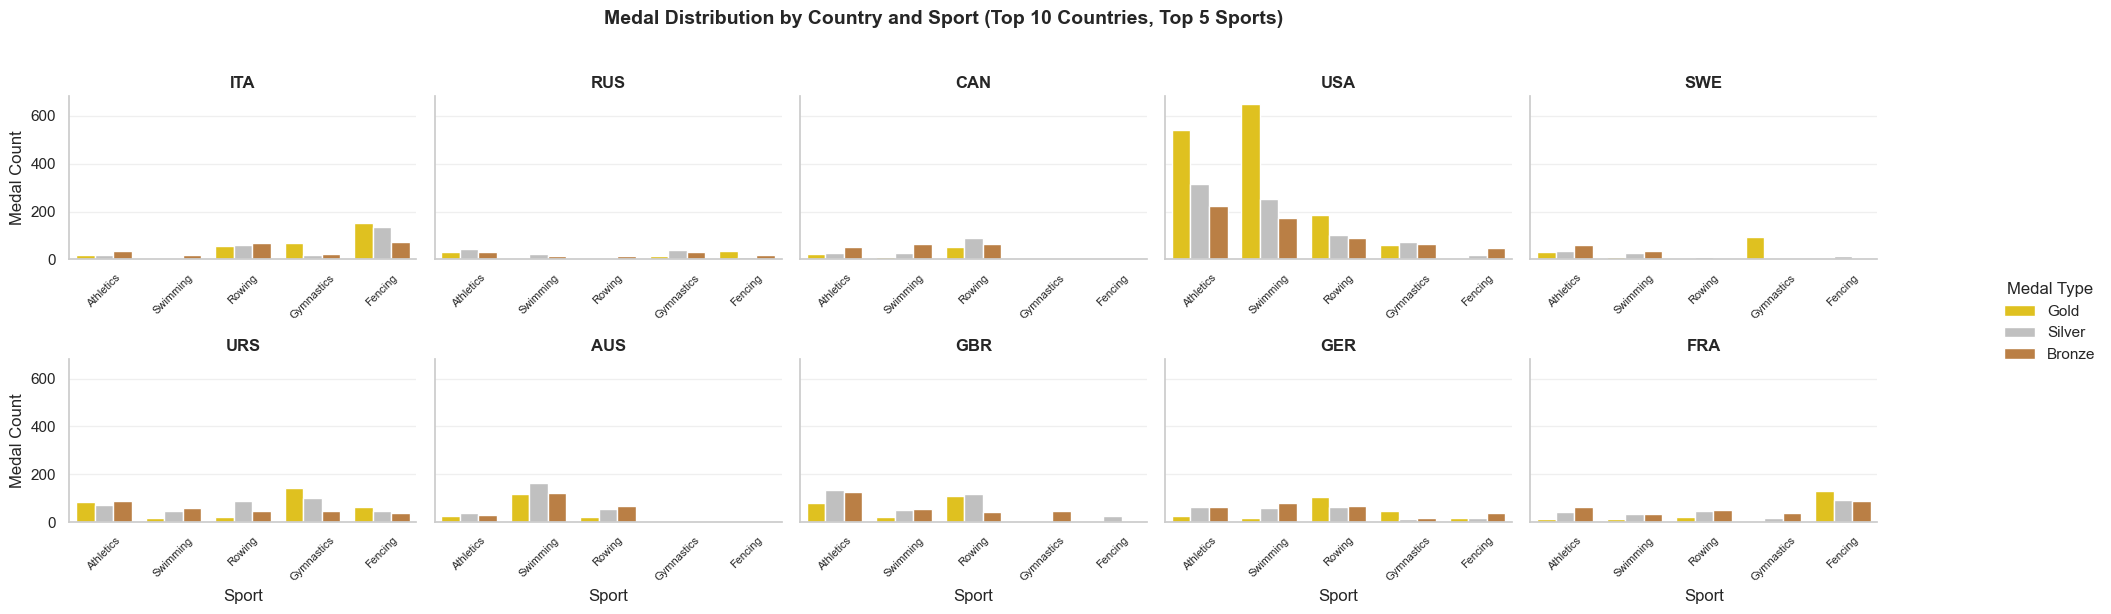


Interpretation:
This small multiples visualization reveals country-specific dominance patterns:
- Each panel shows one country's medal distribution across major sports
- Gold/Silver/Bronze breakdown visible for each sport
- Easy comparison of specialization vs diversification strategies
- Identifies which countries dominate which sports (e.g., USA in Swimming)


In [26]:
# Set style
sns.set_style('whitegrid')
sns.set_palette('colorblind')

# Prepare data: Top 10 countries and top 5 sports
top_countries = df[df['Medal'].notna()].groupby('NOC')['Medal'].count().nlargest(10).index
top_sports = df[df['Medal'].notna()].groupby('Sport')['Medal'].count().nlargest(5).index

# Filter data
filtered_df = df[(df['NOC'].isin(top_countries)) & (df['Sport'].isin(top_sports)) & (df['Medal'].notna())]

# Create small multiples - one subplot per country
g = sns.FacetGrid(
    filtered_df,
    col='NOC',
    col_wrap=5,
    height=3,
    aspect=1.2,
    sharex=False,
    sharey=True
)

# Map bar plot to each facet
g.map_dataframe(
    sns.countplot,
    x='Sport',
    hue='Medal',
    order=top_sports,
    hue_order=['Gold', 'Silver', 'Bronze'],
    palette=['gold', 'silver', '#CD7F32']
)

# Customize
g.set_axis_labels('Sport', 'Medal Count')
g.set_titles('{col_name}', fontweight='bold', fontsize=12)
g.add_legend(title='Medal Type', bbox_to_anchor=(1.05, 0.5), loc='center left')

# Rotate x-axis labels
for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=45, labelsize=8)
    ax.grid(axis='y', alpha=0.3)

g.fig.suptitle(
    'Medal Distribution by Country and Sport (Top 10 Countries, Top 5 Sports)',
    y=1.02,
    fontsize=14,
    fontweight='bold'
)

plt.tight_layout()
plt.show()

print("\nInterpretation:")
print("This small multiples visualization reveals country-specific dominance patterns:")
print("- Each panel shows one country's medal distribution across major sports")
print("- Gold/Silver/Bronze breakdown visible for each sport")
print("- Easy comparison of specialization vs diversification strategies")
print("- Identifies which countries dominate which sports (e.g., USA in Swimming)")

## Data export

In [37]:
# Save the cleaned and wrangled DataFrame to a new CSV file
df.to_csv('athlete_events_cleaned.csv', index=False)

print("Cleaned and wrangled data exported successfully!")
print(f"File saved as: 'athlete_events_cleaned.csv'")
print(f"Total rows: {len(df):,}")
print(f"Total columns: {len(df.columns)}")
print(f"\nNew columns added during wrangling:")
print("  - Year_dt (datetime)")
print("  - Age_Group (categorical)")
print("  - Century (integer)")
print("  - Decade (integer)")
print("  - Won_Medal (boolean)")

Cleaned and wrangled data exported successfully!
File saved as: 'athlete_events_cleaned.csv'
Total rows: 269,731
Total columns: 20

New columns added during wrangling:
  - Year_dt (datetime)
  - Age_Group (categorical)
  - Century (integer)
  - Decade (integer)
  - Won_Medal (boolean)


In [38]:
# Load the exported CSV file
df_loaded = pd.read_csv('new_athlete_cleaned.csv')

print("Verification: Loading exported file...")
print(f"✓ File loaded successfully!")
print(f"✓ Rows: {len(df_loaded):,}")
print(f"✓ Columns: {len(df_loaded.columns)}")

print("\nFirst 5 rows of loaded file:")
print(df_loaded.head())

print("\nColumn names:")
print(list(df_loaded.columns))

print("\nVerification:")
print(f"Rows match original: {len(df) == len(df_loaded)}")
print(f"Columns match original: {len(df.columns) == len(df_loaded.columns)}")

Verification: Loading exported file...
✓ File loaded successfully!
✓ Rows: 269,731
✓ Columns: 20

First 5 rows of loaded file:
   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   ...                             Event Medal     Year_dt Age_Group Century  \
0  ...       Basketball Men's Basketball   NaN  1992-01-01     19-25      20   
1  ...      Judo Men's Extra-Lightweight   NaN  2012-01-01     19-25      21   
2  ...           Football Men's Football   NaN  1920-01-01     19-25      20   
3  ...       Tug-Of-War Men's Tug-Of-War  Gold  1900-01-01     26-35      19   
4  ...  Sp

In [51]:
# ==========================================
# Export visualizations as image files
# ==========================================

print("Exporting visualizations as image files...")

# Export Visualization 1: Small Multiples (FacetGrid)
# Uses the existing `g` object created in the small-multiples cell
g.fig.savefig(
    'visualization_1_small_multiples.png',
    dpi=300,
    bbox_inches='tight'
)

print("✓ Visualizations exported successfully:")
print("  - visualization_1_small_multiples.png")
print("\nFiles are saved in the current working directory (same folder as this notebook/script).")

Exporting visualizations as image files...
✓ Visualizations exported successfully:
  - visualization_1_small_multiples.png

Files are saved in the current working directory (same folder as this notebook/script).


## Conclusion

This project set out to explore patterns, trends, and structural dynamics within more than a century of Olympic history using the publicly available athlete_events.csv dataset. Through a combination of data wrangling, descriptive analytics, and visualization, the analysis provided a coherent view of how athlete characteristics, medal distributions, country performance, gender participation, and sport-specific trends have evolved over time. The findings reinforce the value of systematic data analysis for revealing deeper narratives that are not easily observable through anecdotal records or isolated statistics.

One of the clearest insights from the study concerns age variation across sports. The comparison of average ages showed a distinct divide between sports that rely on experience, strategy, or technical precision—such as equestrian events, shooting, and polo—and those that demand peak physical explosiveness, where athletes tend to be considerably younger. This pattern aligns with established performance research and confirms the dataset’s reliability in reflecting real-world sport physiology.

Another major contribution of the analysis lies in its exploration of global medal distributions. The dominance of nations such as the United States, the former Soviet Union, Germany, and Great Britain highlights not only historical investment in elite sport, but also the size and structure of their Olympic delegations. Likewise, the small-multiples visualisation revealed that national strengths are highly sport-specific: some countries exhibit broad success across disciplines, while others concentrate their achievements in areas that align with local traditions or strategic prioritisation.

Temporal trends also provided important context. Participation has increased significantly across decades, Paralelling global population growth, expanding international involvement, and institutional developments within the Olympic movement. The rising proportion of female athletes reflects meaningful progress toward gender inclusion, although differences in medal rates and representation still deserve further investigation.

The gender-specific analysis offered a nuanced perspective: while male competitors still represent a larger share of total participants, the medal-winning efficiency between genders was remarkably similar. This convergence suggests that, once structural access barriers are reduced, performance levels become more comparable—a valuable insight for the broader conversation around equity in sport.

Finally, the exploration of medal-win rates by country captured competitive efficiency rather than raw counts. This metric offered a more balanced understanding of success, revealing that smaller or historically transitional nations often perform better relative to their delegation size.

Overall, the project demonstrates the importance of thoughtful data cleaning, structured wrangling, and clear visual communication. By applying systematic analytical methods, it becomes possible to translate a complex historical dataset into accessible insights that deepen our understanding of Olympic history and global athletic performance.